# Self Organizing Map Credit Fraud #

In this notebook we will apply SOM to detect frauds, in particular which customers actually cheated. These customers will represent the outliers

The dataset can be found here:

http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3:
 - A1: 0,1 CATEGORICAL (formerly: a,b) 
 - A2: continuous. 
 - A3: continuous. 
 - A4: 1,2,3 CATEGORICAL (formerly: p,g,gg) 
 - A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x) 
 - A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z) 
 - A7: continuous. 
 - A8: 1, 0 CATEGORICAL (formerly: t, f) 
 - A9: 1, 0	CATEGORICAL (formerly: t, f) 
 - A10: continuous. 
 - A11: 1, 0	CATEGORICAL (formerly t, f) 
 - A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p) 
 - A13: continuous. 
 - A14: continuous. 
 - A15: 1,2 class attribute (formerly: +,-)


    

## Import Libraries 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessingprocessing import MinMaxScaler

## Dataset 

In [20]:
df = pd.read_csv('Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
CustomerID    690 non-null int64
A1            690 non-null int64
A2            690 non-null float64
A3            690 non-null float64
A4            690 non-null int64
A5            690 non-null int64
A6            690 non-null int64
A7            690 non-null float64
A8            690 non-null int64
A9            690 non-null int64
A10           690 non-null int64
A11           690 non-null int64
A12           690 non-null int64
A13           690 non-null int64
A14           690 non-null int64
Class         690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.3 KB


In [22]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


We divide our datatset into two subsets X and y. In our SOM we will only use X

In [125]:
# Divide Dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [129]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

We will use an existing implementation of SOM

In [50]:
from minisom import MiniSom

In [185]:
# Use a 10 x 10 grid
som = MiniSom( x = 10, y = 10, input_len = X.shape[1], sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 200)

## Visualize Results

In [77]:
from pylab import bone, pcolor, colorbar, plot, show, legend

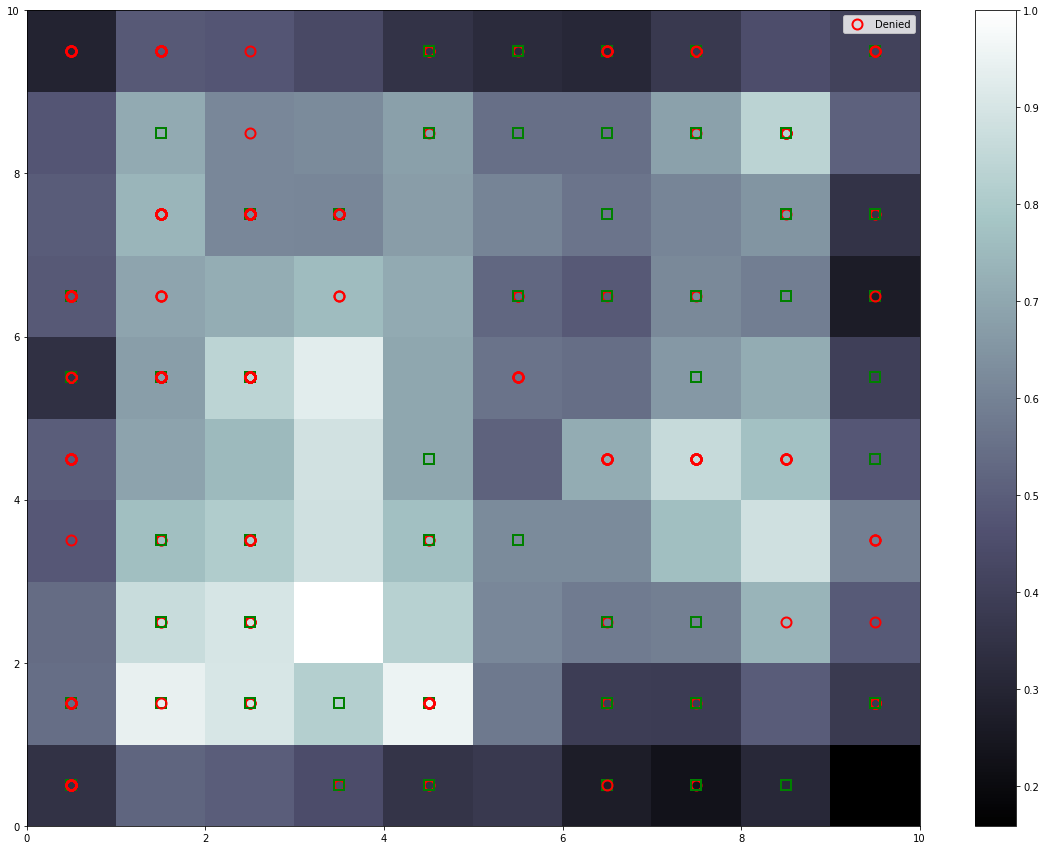

In [186]:
# Plot
plt.figure(figsize=(20,15))
bone() # Initialize the window
pcolor(som.distance_map().T) # Will return all the min interneuron distances(MID) scaled from 0 to 1 in one matrix
colorbar() # Legend
markers = ['o', 's'] # Markers
colors = ['r', 'g'] # Colors
label = ['Denied']
for i, x in enumerate(X):
    w = som.winner(x) # Winning node for customer x
    # We place the marker in the center of the square (w[0] and w[1] are the coordinates)
    plot(w[0] + 0.5,  
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2,)
legend(label)
    

We can notice that the highest MID correspond to the dark color while the smallest MID correspond to the white color. The value are between 0 and 1 since the data have been normalized between 0 and 1.

The white winning nodes represented in white have larger MID and so they correspond to the outliers.
In the white square that represents the outlier we can notice some approval and not approval since we have both a square and a circle.

In particular we are interested in finding the ones that got approved but that we identify as outliers.

The red square represent customers that were not approved while the green the customers that were approved.

## Finding the Frauds

In [187]:
mappings = som.win_map(X) # Map the winning nodes to the customers associated
frauds = np.concatenate((mappings[(1,1)],mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform( frauds )
frauds[:,0]

array([ 15766183.,  15772329.,  15734649.,  15646082.,  15717629.,
        15776545.,  15719940.,  15801441.,  15761158.,  15711742.,
        15761733.,  15770995.,  15788131.,  15699963.,  15666166.,
        15736399.,  15766734.,  15667934.,  15665087.,  15667588.])